## Log-normal mean approximation

This notebook describes motivation of usage erfcx for mean calculation of truncated log-normal distribution. Also, it provides function for erfcx evaluation via elementary functions as soon TensorFlow doesn't have erfcx function by default.

Remind that mean of truncated log-normal distribution has formula:

$$\mathbb{E}\mathcal{N}(\mu, \sigma^2, a, b) = \frac{1}{Z}\exp(\mu+\sigma^2/2) \bigg[\Phi\bigg(\frac{\sigma^2+\mu-a}{\sigma}\bigg) - \Phi\bigg(\frac{\sigma^2+\mu-b}{\sigma}\bigg)\bigg],$$

where $Z = \Phi\bigg(\frac{b-\mu}{\sigma}\bigg) - \Phi\bigg(\frac{a-\mu}{\sigma}\bigg)$,  
$\Phi$ – CDF of standart normal distribution.

**Error function** (erf) appears when we want to calculate function $\Phi$ and is defined as:
$$\text{erf} = \frac{1}{\sqrt{\pi}} \int_{-x}^{x}e^{-t^2}dt.$$
**Complementary error function** (erfc) is defined as $\text{erfc}(x) = 1 - \text{erf}(x)$.

So CDF function:
$$\Phi(x) = \frac{1}{2}\text{erfc}\big(-x/\sqrt{2}\big).$$

But sometimes it's useful to compute **scaled complementary error function** (erfcx) which is defined as $\text{erfcx}(x) = \exp(x^2)\text{erfc}(x)$

In [6]:
%pylab inline
import seaborn as sns
from scipy import special

Populating the interactive namespace from numpy and matplotlib


In [29]:
def phi(x):
    return 0.5*special.erfc(-x/np.sqrt(2.0))


def mean_truncated_log_normal_st(mu, sigma, a, b):
    alpha = (a - mu)/sigma
    beta = (b - mu)/sigma
    z = phi(beta) - phi(alpha)
    mean = np.exp(mu+sigma*sigma/2.0)/z*(phi(sigma-alpha) - phi(sigma-beta))
    return mean


def my_erfcx(x):
    """M. M. Shepherd and J. G. Laframboise,
       MATHEMATICS OF COMPUTATION 36, 249 (1981)
    """
    K = 3.75
    y = (np.abs(x)-K) / (np.abs(x)+K)
    y2 = 2.0*y
    (d, dd) = (-0.4e-20, 0.0)
    (d, dd) = (y2 * d - dd + 0.3e-20, d)
    (d, dd) = (y2 * d - dd + 0.97e-19, d)
    (d, dd) = (y2 * d - dd + 0.27e-19, d)
    (d, dd) = (y2 * d - dd + -0.2187e-17, d)
    (d, dd) = (y2 * d - dd + -0.2237e-17, d)
    (d, dd) = (y2 * d - dd + 0.50681e-16, d)
    (d, dd) = (y2 * d - dd + 0.74182e-16, d)
    (d, dd) = (y2 * d - dd + -0.1250795e-14, d)
    (d, dd) = (y2 * d - dd + -0.1864563e-14, d)
    (d, dd) = (y2 * d - dd + 0.33478119e-13, d)
    (d, dd) = (y2 * d - dd + 0.32525481e-13, d)
    (d, dd) = (y2 * d - dd + -0.965469675e-12, d)
    (d, dd) = (y2 * d - dd + 0.194558685e-12, d)
    (d, dd) = (y2 * d - dd + 0.28687950109e-10, d)
    (d, dd) = (y2 * d - dd + -0.63180883409e-10, d)
    (d, dd) = (y2 * d - dd + -0.775440020883e-09, d)
    (d, dd) = (y2 * d - dd + 0.4521959811218e-08, d)
    (d, dd) = (y2 * d - dd + 0.10764999465671e-07, d)
    (d, dd) = (y2 * d - dd + -0.218864010492344e-06, d)
    (d, dd) = (y2 * d - dd + 0.774038306619849e-06, d)
    (d, dd) = (y2 * d - dd + 0.4139027986073010e-05, d)
    (d, dd) = (y2 * d - dd + -0.69169733025012064e-04, d)
    (d, dd) = (y2 * d - dd + 0.490775836525808632e-03, d)
    (d, dd) = (y2 * d - dd + -0.2413163540417608191e-02, d)
    (d, dd) = (y2 * d - dd + 0.9074997670705265094e-02, d)
    (d, dd) = (y2 * d - dd + -0.26658668435305752277e-01, d)
    (d, dd) = (y2 * d - dd + 0.59209939998191890498e-01, d)
    (d, dd) = (y2 * d - dd + -0.84249133366517915584e-01, d)
    (d, dd) = (y2 * d - dd + -0.4590054580646477331e-02, d)
    d = y * d - dd + 0.1177578934567401754080e+01
    result = d/(1.0+2.0*np.abs(x))
    result = np.where(np.isnan(result), np.ones_like(result), result)
    result = np.where(np.isinf(result), np.ones_like(result), result)
    
    negative_mask = np.less(x, 0.0)
    positive_mask = np.greater_equal(x, 0.0)
    negative_result = 2.0*np.exp(x*x)-result
    negative_result = np.where(np.isnan(negative_result), np.ones_like(negative_result), negative_result)
    negative_result = np.where(np.isinf(negative_result), np.ones_like(negative_result), negative_result)
    result = negative_mask * negative_result + positive_mask * result
    return result


def mean_truncated_log_normal_red(mu, sigma, a, b):
    alpha = (a - mu)/sigma
    beta = (b - mu)/sigma
    z = phi(beta) - phi(alpha)
    mean = my_erfcx((sigma-beta)/np.sqrt(2.0))*np.exp(b-beta*beta/2)
    mean = mean - my_erfcx((sigma-alpha)/np.sqrt(2.0))*np.exp(a-alpha*alpha/2)
    mean = mean/(2*z)
    return mean

def mean_truncated_log_normal_scipy(mu, sigma, a, b):
    alpha = (a - mu)/sigma
    beta = (b - mu)/sigma
    z = phi(beta) - phi(alpha)
    mean = special.erfcx((sigma-beta)/np.sqrt(2.0))*np.exp(b-beta*beta/2)
    mean = mean - special.erfcx((sigma-alpha)/np.sqrt(2.0))*np.exp(a-alpha*alpha/2)
    mean = mean/(2*z)
    return mean

## Error of erfcx

First of all, let's check that values of erfcx function are very close to the scipy implimentaion of erfcx.

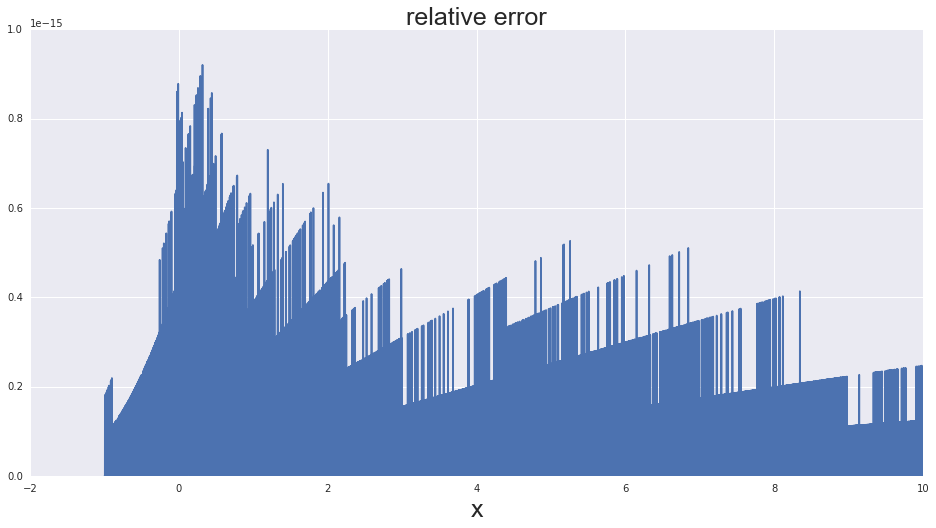

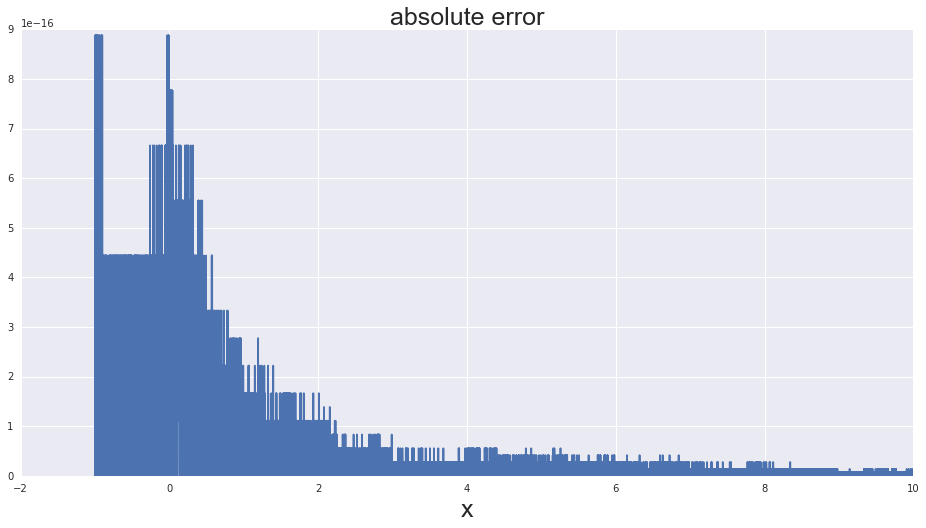

In [11]:
figsize(16,8)

x = np.arange(-1.0, 10. ,1e-3)
plt.plot(x, np.abs(my_erfcx(x)-special.erfcx(x))/special.erfcx(x))
plt.xlabel('x', fontsize=25)
plt.title('relative error', fontsize=25)
plt.show()

plt.plot(x, np.abs(my_erfcx(x)-special.erfcx(x)))
plt.title('absolute error', fontsize=25)
plt.xlabel('x', fontsize=25)
plt.show()

In [30]:
mu = np.arange(-2., 0.0, 1e-2)
log_sigma = np.arange(-5., 3.0, 1e-2)
sigma = np.exp(log_sigma)

x, y = np.meshgrid(mu, sigma)
mean_st = mean_truncated_log_normal_st(x, y, -20.0, 0.0)
mean_red = mean_truncated_log_normal_red(x, y, -20.0, 0.0)
mean_scipy = mean_truncated_log_normal_scipy(x, y, -20.0, 0.0)

/Users/kirusha/PythonProjects/dm-env/lib/python2.7/site-packages/ipykernel/__main__.py:57: RuntimeWarning: overflow encountered in exp
/Users/kirusha/PythonProjects/dm-env/lib/python2.7/site-packages/ipykernel/__main__.py:57: RuntimeWarning: overflow encountered in multiply
/Users/kirusha/PythonProjects/dm-env/lib/python2.7/site-packages/ipykernel/__main__.py:77: RuntimeWarning: invalid value encountered in multiply


Pictures below show different values of mean of truncated log-normal distribution. Dark areas correspond to undefined values of mean.

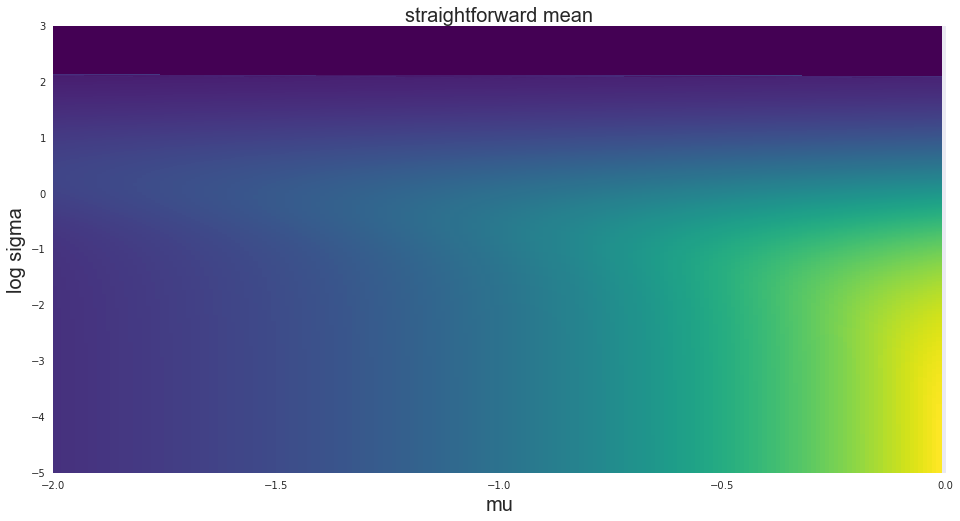

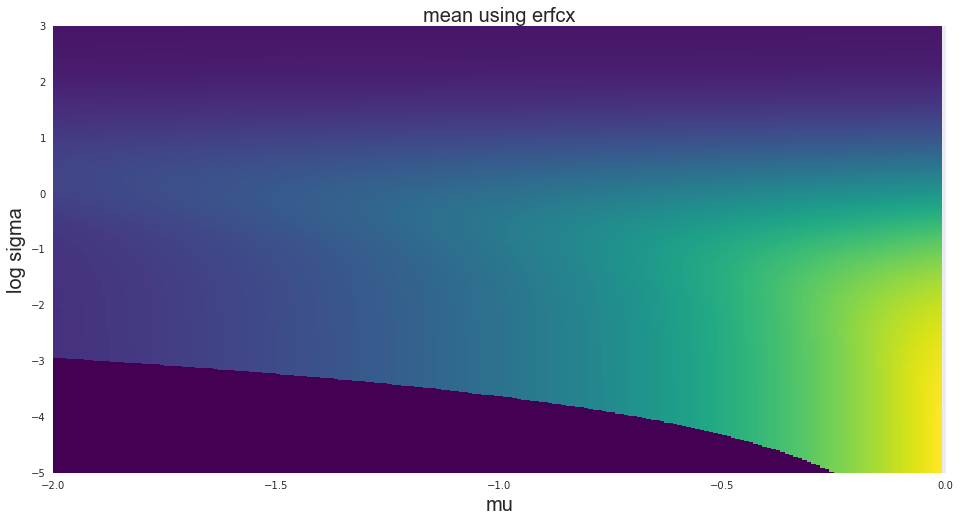

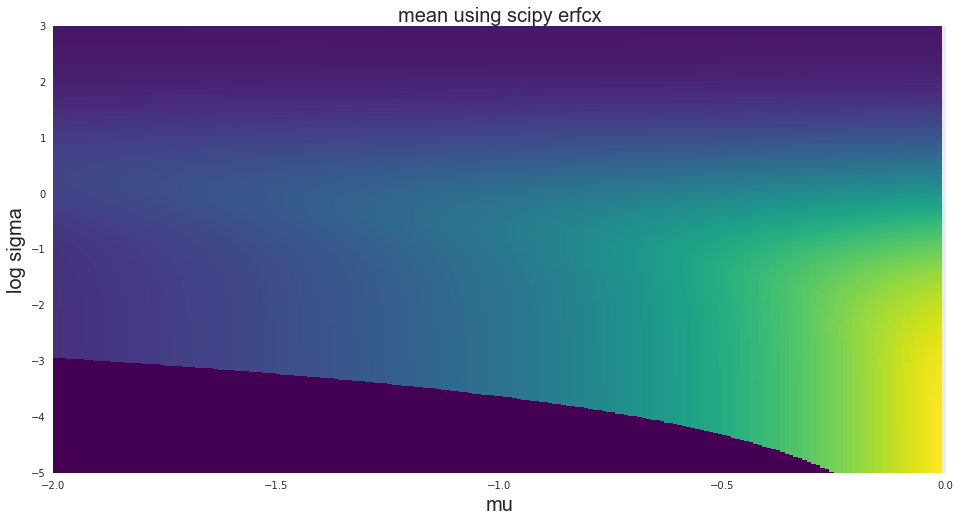

In [32]:
figsize(16, 8)
fig, ax = plt.subplots()
ax.pcolor(mu, log_sigma, mean_st, cmap='viridis')
plt.title('straightforward mean', fontsize=20)
plt.xlabel('mu', fontsize=20)
plt.ylabel('log sigma', fontsize=20)
plt.show()

mean_red[np.isnan(mean_red)] = 1.0
mean_red[np.isinf(mean_red)] = 1.0
fig, ax = plt.subplots()
ax.pcolor(mu, log_sigma, mean_red, cmap='viridis')
plt.title('mean using erfcx', fontsize=20)
plt.xlabel('mu', fontsize=20)
plt.ylabel('log sigma', fontsize=20)
plt.show()

mean_scipy[np.isnan(mean_scipy)] = 0.0
mean_scipy[np.isinf(mean_scipy)] = 0.0
fig, ax = plt.subplots()
ax.pcolor(mu, log_sigma, mean_scipy, cmap='viridis')
plt.title('mean using scipy erfcx', fontsize=20)
plt.xlabel('mu', fontsize=20)
plt.ylabel('log sigma', fontsize=20)
plt.show()